In [22]:
import numpy as np
np.set_printoptions(threshold=np.nan)
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
from pylab import rcParams
from pandas.plotting import parallel_coordinates

plt.rcParams["font.family"] = 'serif'
plt.rcParams["font.size"] = '14'

Populating the interactive namespace from numpy and matplotlib


C:\Users\Francesca\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['hist']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [23]:
series = pd.Series.from_csv('ibm_daily_1962-2018.csv', sep='\t',header=0)

# Divisione in anni (con normalizzazione dei valori)

In [24]:
from pandas import TimeGrouper
from pandas import DataFrame
years=[]
groups = series.groupby(TimeGrouper('A'))
series_df=DataFrame()

for name, group in groups:
    norm_values = (group.values - mean(group.values)) / std(group.values)
    series_df[name.year]=pd.Series(norm_values).rolling(window=4, min_periods=1).mean()
    years.append(name.year)
series_df.head()

,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,1.776867,-2.140522,-1.614994,-2.278684,-0.679659,-1.833692,-0.519033,-0.643405,1.866399,-0.242625,...,-1.802252,-0.069982,-2.199020,-1.403257,0.001766,0.435955,0.516034,-1.246023,0.767625,-0.626892
1,1.737082,-2.222870,-1.498249,-2.348565,-0.752333,-1.851600,-0.678799,-0.712626,1.887177,-0.331339,...,-1.711112,-0.034510,-2.182659,-1.486313,0.072817,0.375176,0.514294,-1.196985,0.799557,-0.354324
2,1.744223,-2.110022,-1.523265,-2.362541,-0.782614,-1.876672,-0.824759,-0.804920,1.914882,-0.309653,...,-1.664162,-0.069982,-2.184062,-1.550277,0.052132,0.393674,0.467293,-1.247715,0.851117,-0.115666
3,1.727901,-2.053598,-1.533689,-2.333590,-0.775044,-1.871300,-0.964309,-0.908751,1.930466,-0.278110,...,-1.627718,-0.116450,-2.189671,-1.597295,0.024026,0.386187,0.390046,-1.287453,0.865285,0.137548
4,1.669753,-1.989549,-1.550367,-2.261713,-0.770502,-1.844437,-1.159579,-1.032771,1.959903,-0.284025,...,-1.557112,-0.191295,-2.152742,-1.759471,-0.002281,0.432871,0.279724,-1.338605,0.916500,0.529126


In [25]:
#VIENE ELIMINATO IL 2018
series_df1=series_df.drop([2018], axis=1)
if (2018 in years):
    years.remove(2018)
series_df1.head()

,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,1.776867,-2.140522,-1.614994,-2.278684,-0.679659,-1.833692,-0.519033,-0.643405,1.866399,-0.242625,...,-0.064971,-1.802252,-0.069982,-2.199020,-1.403257,0.001766,0.435955,0.516034,-1.246023,0.767625
1,1.737082,-2.222870,-1.498249,-2.348565,-0.752333,-1.851600,-0.678799,-0.712626,1.887177,-0.331339,...,-0.193236,-1.711112,-0.034510,-2.182659,-1.486313,0.072817,0.375176,0.514294,-1.196985,0.799557
2,1.744223,-2.110022,-1.523265,-2.362541,-0.782614,-1.876672,-0.824759,-0.804920,1.914882,-0.309653,...,-0.254080,-1.664162,-0.069982,-2.184062,-1.550277,0.052132,0.393674,0.467293,-1.247715,0.851117
3,1.727901,-2.053598,-1.533689,-2.333590,-0.775044,-1.871300,-0.964309,-0.908751,1.930466,-0.278110,...,-0.341543,-1.627718,-0.116450,-2.189671,-1.597295,0.024026,0.386187,0.390046,-1.287453,0.865285
4,1.669753,-1.989549,-1.550367,-2.261713,-0.770502,-1.844437,-1.159579,-1.032771,1.959903,-0.284025,...,-0.479367,-1.557112,-0.191295,-2.152742,-1.759471,-0.002281,0.432871,0.279724,-1.338605,0.916500


In [26]:
#sostituisce i NaN con la media
series_df_nn=series_df1.apply(lambda x: x.fillna(x.mean())) 

In [27]:
#traspone la matrice
series_df_tn=series_df_nn.T

In [28]:
#converte in numpy array
series_df_tn_a = series_df_tn.values

# Clustering con shape-based similarity: K-means

In [29]:
from sklearn.metrics import *
from sklearn.cluster import KMeans

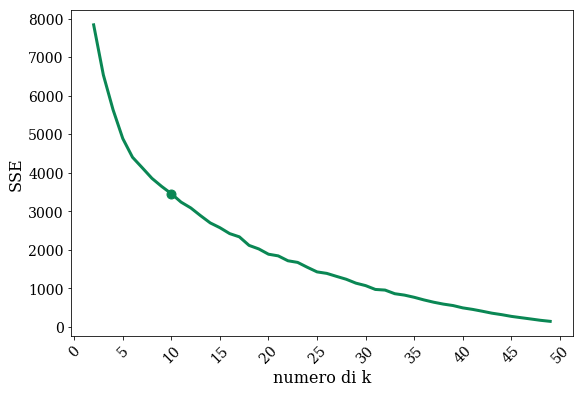

In [30]:
#identificazione del migliore valore di k
sse_list = list()
max_k = 50
plt.rcParams['figure.figsize'] = (9, 6)
for k in range(2,max_k):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=30, max_iter=200, random_state=4)
    kmeans.fit(series_df_tn_a)
    sse = kmeans.inertia_
    sse_list.append(sse)
plt.plot(range(2,max_k), sse_list, linewidth=3, color="#0A8754")
plt.plot(10, sse_list[8],'o', color="#0A8754", markersize=9)
plt.xlabel('numero di k', fontsize=16)
plt.ylabel ('SSE', fontsize=16)
plt.xticks(np.arange(0, 50+1, 5), rotation = '45', fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('Images/TimeSeries/KMeansSSE_norm.png', format='png', bbox_inches='tight')

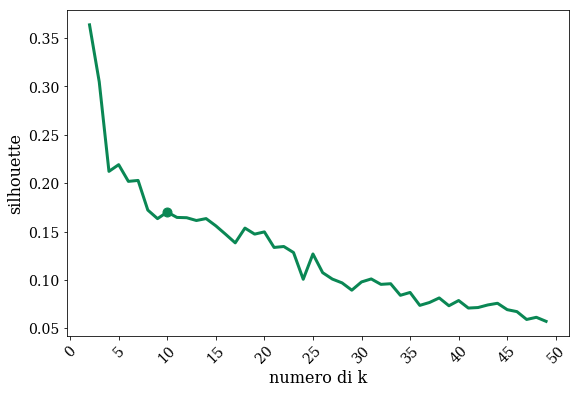

In [31]:
sil_list = list()
max_k = 50
plt.rcParams['figure.figsize'] = (9, 6)
for k in range(2,max_k):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=30, max_iter=200, random_state=4)
    kmeans.fit(series_df_tn_a)
    sil = silhouette_score(series_df_tn_a, kmeans.labels_)
    sil_list.append(sil)
plt.plot(range(2,max_k), sil_list, linewidth=3, color="#0A8754")
plt.plot(10, sil_list[8],'o', color="#0A8754", markersize=9)
plt.xlabel('numero di k', fontsize=16)
plt.ylabel('silhouette', fontsize=16)
plt.xticks(np.arange(0, 50+1, 5), rotation = '45', fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('Images/TimeSeries/KMeansSilhouette_norm.png', format='png', bbox_inches='tight')

In [32]:
#k-means con 10 clusters
kmeans1 = KMeans(init='k-means++', n_clusters=10, n_init=30, max_iter=200, random_state=4)
kmeans1.fit(series_df_tn_a)
hist, bins = np.histogram(kmeans1.labels_, bins=range(0, len(set(kmeans1.labels_)) + 1))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print ('labels', dict(zip(bins, hist)))
    print ('sse', kmeans1.inertia_)
    print ('silhouette', silhouette_score(series_df_tn_a, kmeans1.labels_))
    #print ('centers', kmeans1.cluster_centers_)

('labels', {0: 6, 1: 7, 2: 10, 3: 4, 4: 4, 5: 10, 6: 5, 7: 7, 8: 2, 9: 1})
('sse', 3457.1422420952717)
('silhouette', 0.17011984302290353)


In [33]:
#assegna ad ogni riga del dataset il cluster di appartenenza
series_df_tn_a_cl= DataFrame(series_df_tn_a)
series_df_tn_a_cl['Labels'] = kmeans1.labels_

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 <a list of 9 Text yticklabel objects>)

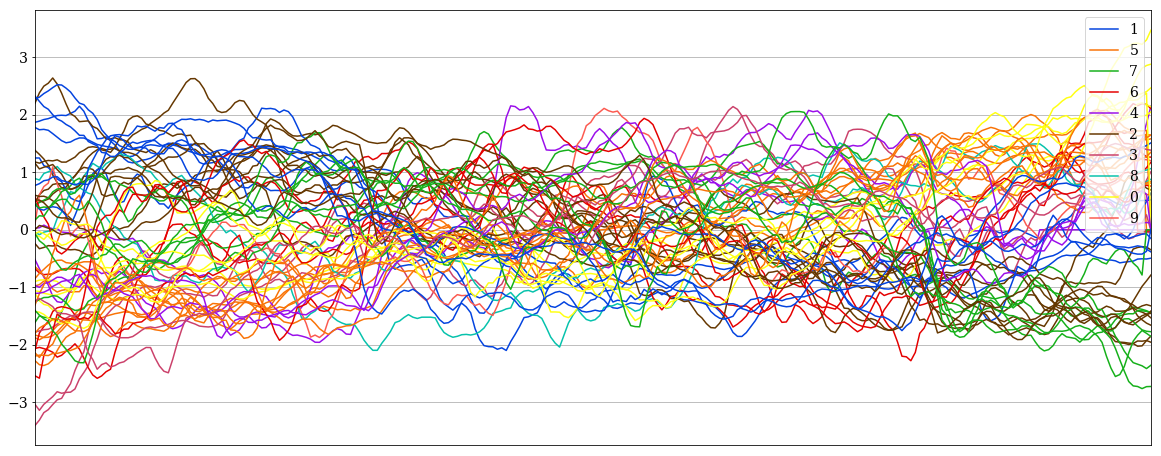

In [34]:
plt.rcParams['figure.figsize'] = (20, 8)
from pandas.plotting import parallel_coordinates
parallel_coordinates(series_df_tn_a_cl, 'Labels', axvlines=False, color=['xkcd:blue', 'xkcd:orange', 'xkcd:green', 'xkcd:red', 'xkcd:violet', 'xkcd:brown', 'xkcd:dark pink', 'xkcd:turquoise','xkcd:yellow', 'xkcd:coral', """'xkcd:fuchsia','xkcd:khaki', 'xkcd:ivory', 'xkcd:silver'"""])
plt.xticks([])
plt.yticks(fontsize=14)

In [70]:
rcParams['figure.figsize'] = 9,4

def YearsCluster(years_list, labels):
    years_cluster = []
    for ndx, year in enumerate(labels):
        years_cluster.append([years_list[ndx], year])
    result = { x: [y[0] for y in years_cluster if y[1] == x] for x in set(labels)}
    return result


def PrintCluster(series, years_list, cluster, color):
    for i in cluster:
        plt.plot(series[years_list.index(i)], color)
        plt.xlabel('numero di giorni', fontsize=16)
        plt.ylabel ('valore di Open', fontsize=16)
    #plt.show()

In [71]:
clusters = YearsCluster(years, kmeans1.labels_)

[1982, 1985, 1996, 1998, 2006, 2010]


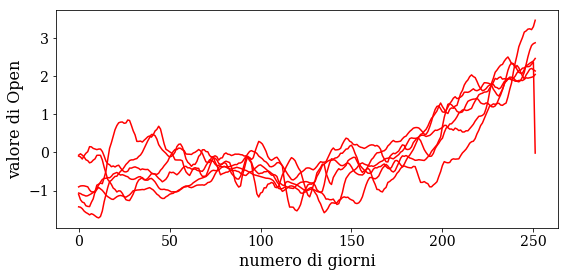

In [72]:
print(clusters[0])
PrintCluster(series_df_tn_a, years, clusters[0], 'Red')
plt.savefig('Images/TimeSeries/KMeansC1.png', format='png', bbox_inches='tight')

[1962, 1970, 1977, 2002, 2004, 2005, 2017]


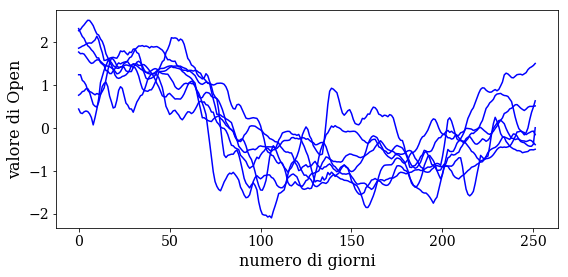

In [73]:
print(clusters[1])
PrintCluster(series_df_tn_a, years, clusters[1], 'Blue')
plt.savefig('Images/TimeSeries/KMeansC2.png', format='png', bbox_inches='tight')

[1971, 1973, 1974, 1979, 1981, 1986, 1989, 1991, 2013, 2015]


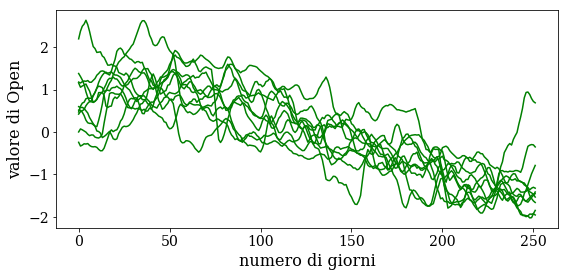

In [74]:
print(clusters[2])
PrintCluster(series_df_tn_a, years, clusters[2], 'Green')
plt.savefig('Images/TimeSeries/KMeansC3.png', format='png', bbox_inches='tight')

[1972, 1976, 1995, 2016]


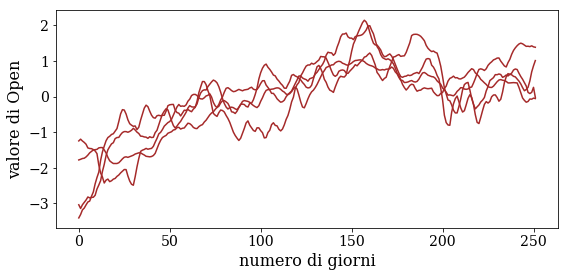

In [75]:
print(clusters[3])
PrintCluster(series_df_tn_a, years, clusters[3], 'Brown')
plt.savefig('Images/TimeSeries/KMeansC4.png', format='png', bbox_inches='tight')

[1968, 1978, 1999, 2007]


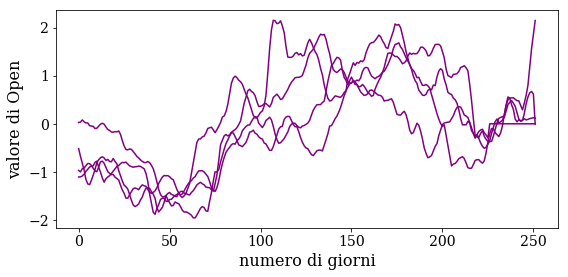

In [76]:
print(clusters[4])
PrintCluster(series_df_tn_a, years, clusters[4], 'Purple')
plt.savefig('Images/TimeSeries/KMeansC5.png', format='png', bbox_inches='tight')

[1963, 1965, 1967, 1969, 1983, 1994, 1997, 2003, 2009, 2011]


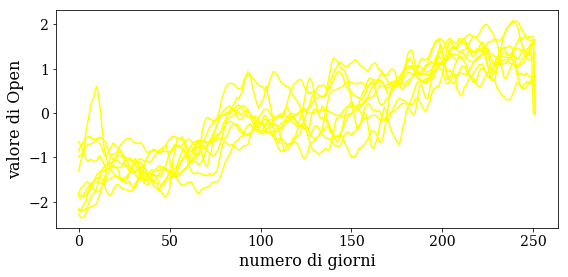

In [77]:
print(clusters[5])
PrintCluster(series_df_tn_a, years, clusters[5], 'Yellow')
plt.savefig('Images/TimeSeries/KMeansC6.png', format='png', bbox_inches='tight')

[1966, 1975, 1990, 1993, 2001]


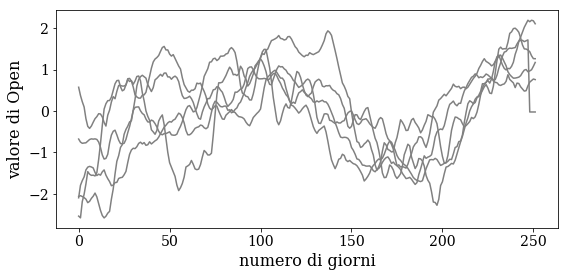

In [78]:
print(clusters[6])
PrintCluster(series_df_tn_a, years, clusters[6], 'Grey')
plt.savefig('Images/TimeSeries/KMeansC7.png', format='png', bbox_inches='tight')

[1964, 1987, 1992, 2000, 2008, 2012, 2014]


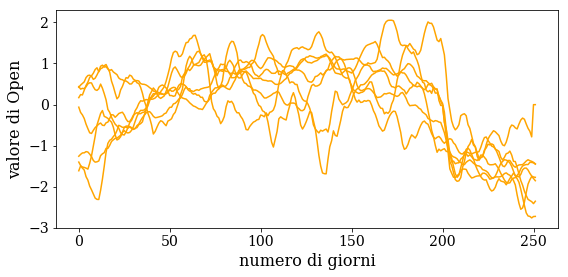

In [79]:
print(clusters[7])
PrintCluster(series_df_tn_a, years, clusters[7], 'Orange')
plt.savefig('Images/TimeSeries/KMeansC8.png', format='png', bbox_inches='tight')

[1980, 1984]


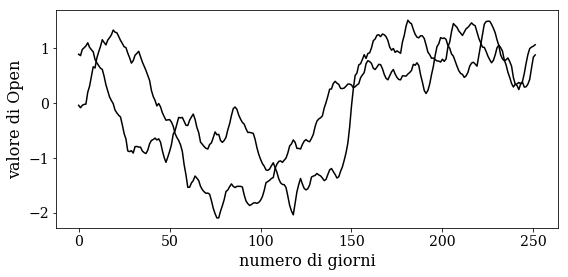

In [80]:
print(clusters[8])
PrintCluster(series_df_tn_a, years, clusters[8], 'Black')
plt.savefig('Images/TimeSeries/KMeansC9.png', format='png', bbox_inches='tight')

[1988]


"print(clusters[10])\nPrintCluster(series_df_tn_a, years, clusters[10], 'Blue')\n\nprint(clusters[11])\nPrintCluster(series_df_tn_a, years, clusters[11], 'Green')\n\nprint(clusters[12])\nPrintCluster(series_df_tn_a, years, clusters[12], 'Brown')\n\nprint(clusters[13])\nPrintCluster(series_df_tn_a, years, clusters[13], 'Purple')"

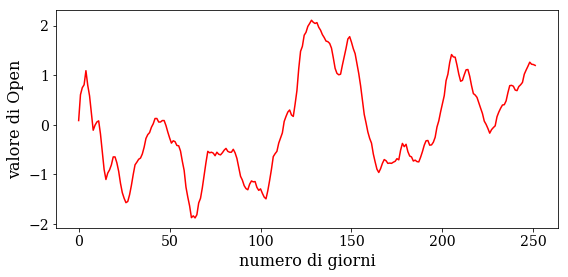

In [81]:
print(clusters[9])
PrintCluster(series_df_tn_a, years, clusters[9], 'Red')
plt.savefig('Images/TimeSeries/KMeansC10.png', format='png', bbox_inches='tight')

"""print(clusters[10])
PrintCluster(series_df_tn_a, years, clusters[10], 'Blue')

print(clusters[11])
PrintCluster(series_df_tn_a, years, clusters[11], 'Green')

print(clusters[12])
PrintCluster(series_df_tn_a, years, clusters[12], 'Brown')

print(clusters[13])
PrintCluster(series_df_tn_a, years, clusters[13], 'Purple')"""